In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline

data = pd.read_csv("data/train_clean.csv")
data.head()

,longitude,latitude,lithology,bathymetry,nitrate,oxygen,phosphate,productivity,salinity,silicate,temperature
0,-180,75,4,-231.0,NaN,8.552258,NaN,310.199677,31.165499,NaN,-0.878415
1,-179,75,4,-203.0,1.702168,9.494461,0.754516,312.468658,29.931450,12.485500,-1.785413
2,-178,75,4,-304.0,1.850258,9.578869,0.735949,291.436279,30.048571,12.902109,-1.904204
3,-177,75,4,-278.0,1.960688,9.668440,0.720070,277.305817,30.211161,13.251008,-1.869162
4,-176,75,4,-247.0,2.056301,9.763065,0.706926,262.947571,30.398439,13.591722,-1.688048


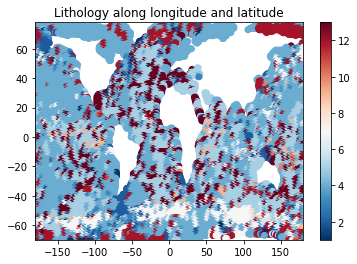

In [10]:
# plot lithology vesus longitude and latitude
lon = data["longitude"].values
lat = data["latitude"].values
y = data["lithology"].values
sc = plt.scatter(lon, lat, c=y, cmap="RdBu_r")
plt.title("Lithology along longitude and latitude")
plt.xlim([-180, 180])
plt.ylim([-70, 78])
plt.colorbar(sc)
plt.show()

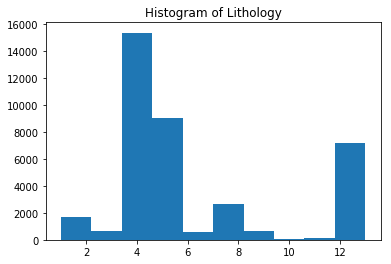

Unique class = [ 1  2  3  4  5  6  7  8  9 10 11 12 13]


In [13]:
# plot the histogram of lithology
plt.hist(y)
plt.title("Histogram of Lithology")
plt.show()
print("Unique class = {}".format(np.unique(y)))

### One-vs-all

Build 13 classifier such that

$$h_\theta^{(i)}(x) = P(y=i|x; \theta) \quad (i=1, 2, ..., 13)$$

Train a logistic regression classifier $h_\theta^{(i)}(x)$ for each class $i$ to predict the probability that $y=i$.

On a new input $x$, to make a prediction, pick the class i that maximizes
$$max_{i} h_\theta^{(i)}(x)$$

In [26]:
# training data should exclude longitude and latitude
training_data = data.copy()
del training_data["longitude"]
del training_data["latitude"]
training_data.head()

# feature missing reports
for col in training_data:
    missing = sum(pd.isnull(training_data[col]))
    print("Missing Count in {:s } = {}".format(col, missing))
    
# fill missing with mean for now
fill_dict = {}
for col in training_data:
    mn = np.mean(training_data[col])
    fill_dict[col] = mn
training_data = training_data.fillna(value=fill_dict)
training_data.head()

Missing Count in lithology = 0
Missing Count in bathymetry = 0
Missing Count in nitrate = 1592
Missing Count in oxygen = 0
Missing Count in phosphate = 1592
Missing Count in productivity = 0
Missing Count in salinity = 0
Missing Count in silicate = 1592
Missing Count in temperature = 0


,lithology,bathymetry,nitrate,oxygen,phosphate,productivity,salinity,silicate,temperature
0,4,-231.0,7.243138,8.552258,0.661274,310.199677,31.165499,10.699096,-0.878415
1,4,-203.0,1.702168,9.494461,0.754516,312.468658,29.931450,12.485500,-1.785413
2,4,-304.0,1.850258,9.578869,0.735949,291.436279,30.048571,12.902109,-1.904204
3,4,-278.0,1.960688,9.668440,0.720070,277.305817,30.211161,13.251008,-1.869162
4,4,-247.0,2.056301,9.763065,0.706926,262.947571,30.398439,13.591722,-1.688048
